TP 2 - Ejercicio 1 - Grupo 3: Florencia Denisse Costa y Guadalupe Sosa Ferro

# Install, importar librerías y montar Drive

In [38]:
from google.colab import drive
import pandas as pd
import numpy as np
from math import log
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# Cargar datos

In [40]:
datos = pd.read_excel("german_credit.xlsx")
# Se cargan los datos del archivo excel utilizando Pandas
# Se guardan en un DataFrame

In [41]:
datos

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


# Discretizar variables

De las 20 variables, 3 de ellas son cuantitativas continuas. Debemos discretizarlas para poder realizar los árboles. Para realizar esto, observamos el histograma de cada una de estas variables, lo cual nos ayudará a decidir la manera más equilibrada de dividirlas.

## Duration of credit (months)

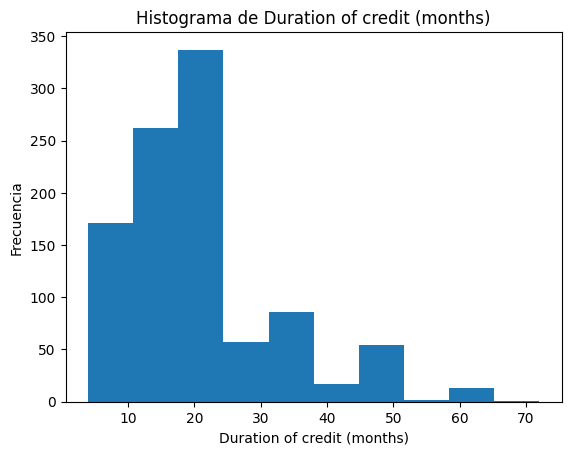

In [42]:
plt.hist(datos.iloc[:,2])
plt.title('Histograma de Duration of credit (months)')
plt.xlabel('Duration of credit (months)')
plt.ylabel('Frecuencia')
plt.show()

Para discretizar la variable Duration of credit (months) se decidió crear 3 categorías:


*   0: duration of credit <= 12
*   1: 12 < duration of credit <= 24
*   2: duration of credit > 24



In [43]:
for i in range(len(datos)):
  if datos.iat[i,2] <= 12: # 359
    datos.iat[i, 2] = 0
  elif datos.iat[i,2] > 12 and datos.iat[i,2] <= 24: # 411
    datos.iat[i, 2] = 1
  elif datos.iat[i,2] > 24: # 143 + 87
    datos.iat[i, 2] = 2

In [44]:
datos.iloc[:,2]

0      1
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    2
Name: Duration of Credit (month), Length: 1000, dtype: int64

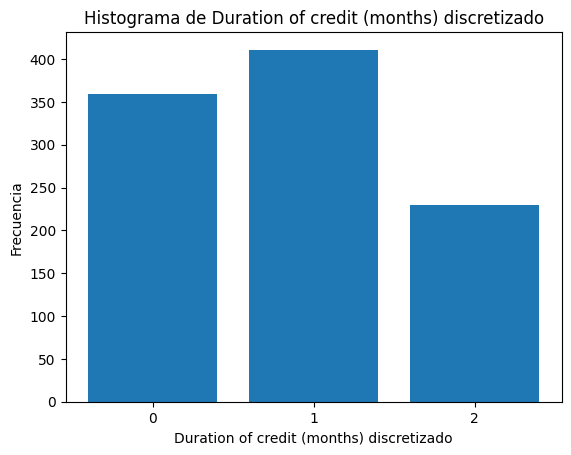

In [45]:
plt.hist(x= datos.iloc[:,2], bins=[-0.5, 0.5, 1.5, 2.5], rwidth=0.8)
plt.xticks([0, 1, 2])
plt.title('Histograma de Duration of credit (months) discretizado')
plt.xlabel('Duration of credit (months) discretizado')
plt.ylabel('Frecuencia')
plt.show()

## Credit amount

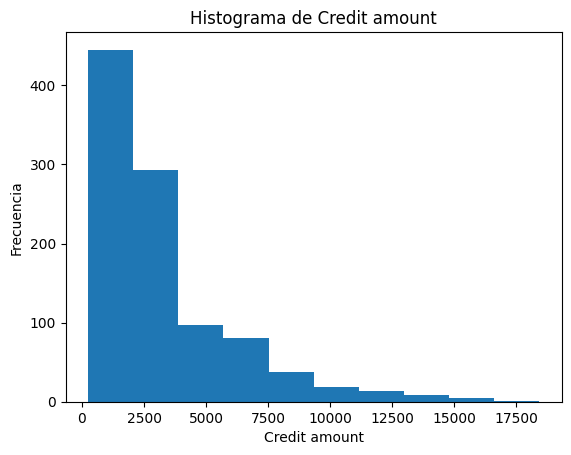

In [46]:
plt.hist(datos.iloc[:,5])
plt.title('Histograma de Credit amount')
plt.xlabel('Credit amount')
plt.ylabel('Frecuencia')
plt.show()

Para discretizar la variable Credit amount se decidió crear 3 categorías:

*   0: credit amount <= 1500
*   1: 1500 < credit amount <= 3000
*   2: credit amount > 3000


In [47]:
for i in range(len(datos)):
  if datos.iat[i,5] <= 1500: # 306
    datos.iat[i, 5] = 0
  elif datos.iat[i,5] > 1500 and datos.iat[i,5] <= 3000: # 312
    datos.iat[i, 5] = 1
  elif datos.iat[i,5] > 3000: # 380
    datos.iat[i, 5] = 2

In [48]:
datos.iloc[:,5]

0      0
1      1
2      0
3      1
4      1
      ..
995    1
996    1
997    2
998    2
999    2
Name: Credit Amount, Length: 1000, dtype: int64

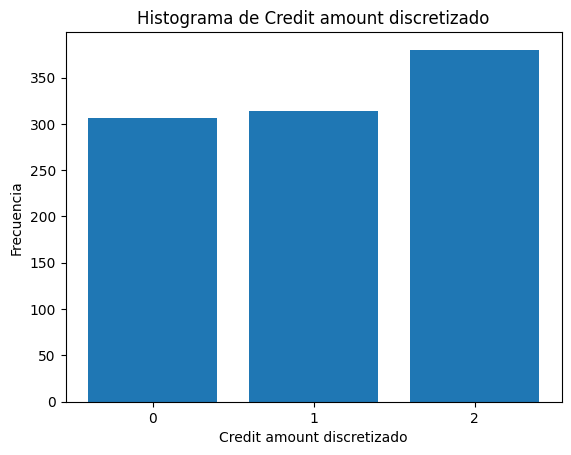

In [49]:
plt.hist(x= datos.iloc[:,5], bins=[-0.5, 0.5, 1.5, 2.5], rwidth=0.8)
plt.xticks([0, 1, 2])
plt.title('Histograma de Credit amount discretizado')
plt.xlabel('Credit amount discretizado')
plt.ylabel('Frecuencia')
plt.show()

## Age (years)

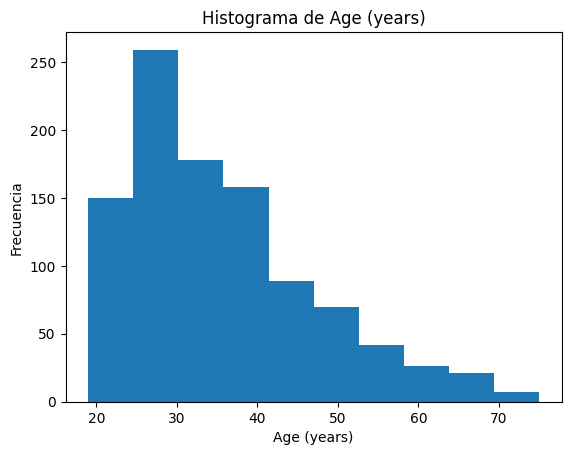

In [50]:
plt.hist(datos.iloc[:,13])
plt.title('Histograma de Age (years)')
plt.xlabel('Age (years)')
plt.ylabel('Frecuencia')
plt.show()

Para discretizar la variable Age (years) se decidió crear 3 categorías:


*   0: age <= 28
*   1: 28 < age <= 38
*   2: age > 38

In [51]:
for i in range(len(datos)):
  if datos.iat[i, 13] <= 28: # 332
    datos.iat[i, 13] = 0
  elif datos.iat[i, 13] > 28 and datos.iat[i, 13] <= 38: # 347
    datos.iat[i, 13] = 1
  elif datos.iat[i, 13] > 38: # 320
    datos.iat[i, 13] = 2

In [52]:
datos.iloc[:,13]

0      0
1      1
2      0
3      2
4      1
      ..
995    0
996    2
997    1
998    2
999    1
Name: Age (years), Length: 1000, dtype: int64

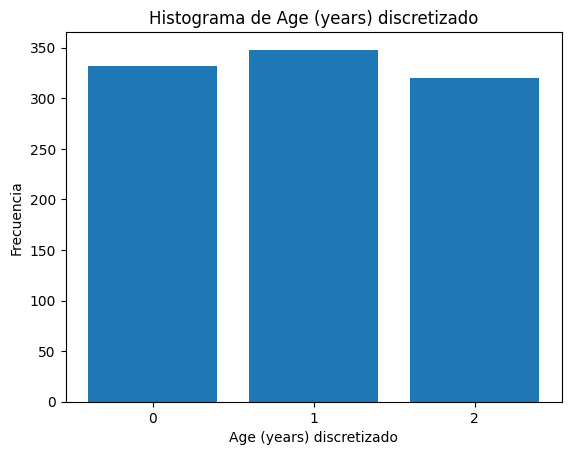

In [53]:
plt.hist(x= datos.iloc[:,13], bins=[-0.5, 0.5, 1.5, 2.5], rwidth=0.8)
plt.xticks([0, 1, 2])
plt.title('Histograma de Age (years) discretizado')
plt.xlabel('Age (years) discretizado')
plt.ylabel('Frecuencia')
plt.show()

# Dividir en conjunto de entrenamiento y de prueba

Para dividir los datos en el conjunto de prueba y entrenamiento, primero se mezclan los registros y luego se toma un 20% de los datos para el conjunto de prueba y el resto para el conjunto de entrenamiento.

In [54]:
datos_1 = datos.sample(frac = 1, random_state=1).reset_index(drop = True) # Mezclar los datos
test_size = 0.2 # Fracción del tamaño del conjunto de prueba
l = int(test_size*len(datos_1))
datos_test = datos_1[:l].reset_index(drop = True)
datos_train = datos_1[l:].reset_index(drop = True)
print(len(datos_test))
print(len(datos_train))

200
800


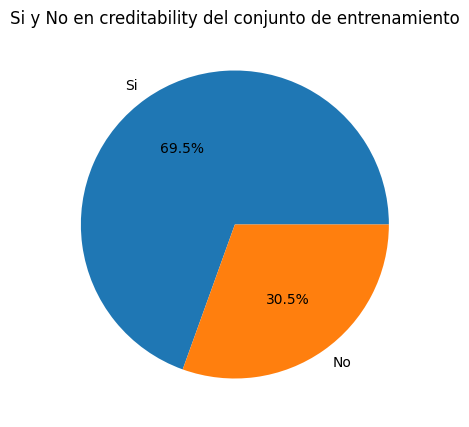

In [55]:
cont_si = len(datos_train.loc[datos_train["Creditability"].isin([1])])
cont_no = len(datos_train.loc[datos_train["Creditability"].isin([0])])
valores = [cont_si, cont_no]
plt.figure(figsize=(5, 5))
plt.pie(valores, labels = ['Si', 'No'], autopct='%1.1f%%')
plt.title("Si y No en creditability del conjunto de entrenamiento")
plt.show()

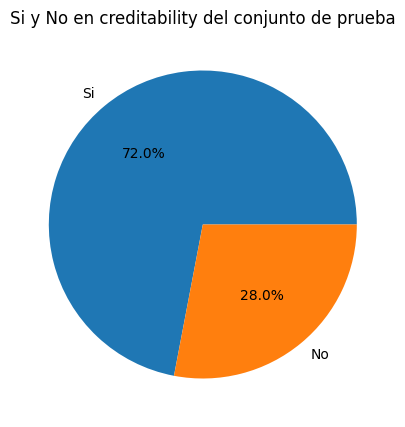

In [56]:
cont_si = len(datos_test.loc[datos_test["Creditability"].isin([1])])
cont_no = len(datos_test.loc[datos_test["Creditability"].isin([0])])
valores = [cont_si, cont_no]
plt.figure(figsize=(5, 5))
plt.pie(valores, labels = ['Si', 'No'], autopct='%1.1f%%')
plt.title("Si y No en creditability del conjunto de prueba")
plt.show()

# Algoritmo ID3

## Atributos

Ejemplos: german_credit.xlsx

Atributo objetivo: creditability

Atributos: el resto de las variables

Almacenamos en un diccionario los atributos y los valores que cada uno puede tomar según la consigna.

In [57]:
atributos_Valores = {
        'Account Balance': [1,2,3,4],
        'Duration of Credit (month)': [0,1,2],
        'Payment Status of Previous Credit': [0,1,2,3,4],
        'Purpose': [0,1,2,3,4,5,6,7,8,9,10],
        'Credit Amount': [0,1,2],
        'Value Savings/Stocks': [1,2,3,4,5],
        'Length of current employment': [1,2,3,4,5],
        'Instalment per cent': [1,2,3,4],
        'Sex & Marital Status': [1,2,3,4],
        'Guarantors': [1,2,3],
        'Duration in Current address': [1,2,3,4],
        'Most valuable available asset': [1,2,3,4],
        'Age (years)': [0,1,2],
        'Concurrent Credits': [1,2,3],
        'Type of apartment': [1,2,3],
        'No of Credits at this Bank': [1,2,3,4],
        'Occupation': [1,2,3,4],
        'No of dependents': [1,2],
        'Telephone': [1,2],
        'Foreign Worker': [1,2],
    }

## Entropía, ganancia y ganancia máxima

Las funciones para calcular la entropía y ganancia se realizaron siguiendo la teoría de la materia.

In [58]:
def calcularEntropia(datos, atributo, valor):
  pp = 0
  pn = 0

  datos_atributos = datos.loc[datos[atributo].isin([valor])]

  if valor != None:
    # H(Sv)
    pp = len(datos_atributos.loc[datos_atributos["Creditability"].isin([1])])
    pn = len(datos_atributos.loc[datos_atributos["Creditability"].isin([0])])
    len_S = len(datos_atributos)
    if len_S != 0:
      pp /= len_S
      pn /= len_S    
    
  else:
    # H(S)
    pp = len(datos.loc[datos["Creditability"].isin([1])])
    pn = len(datos.loc[datos["Creditability"].isin([0])])
    len_S = len(datos)
    if len_S != 0:
      pp /= len_S
      pn /= len_S

  if pp == 0 and pn != 0:
    H = -pn*log(pn,2)
  elif pn == 0 and pp != 0:
    H = -pp*log(pp,2)
  elif pp == 0 and pn == 0:
    H = 0
  else:
    H = -pp*log(pp,2) - pn*log(pn,2)

  return H, len_S

In [59]:
def calcularGanancia(datos, atributo, valores):
  Hs_v_total = 0

  Hs, len_S = calcularEntropia(datos, atributo, None)

  for valor in valores:
    Hs_v, len_Sv = calcularEntropia(datos, atributo, valor)
    Hs_v_total += (Hs_v*abs(len_Sv/len_S))

  ganancia = Hs - Hs_v_total
  
  return ganancia

Esta función permite calcular el atributo que tiene la máxima ganancia. Esto se utiliza para calcular el nodo raíz y los demás nodos.

In [60]:
# Se define el nodo (atributo con ganancia máxima) al calcular la ganancia máxima 
def definirNodo(datos, atributos_Valores):
  ganancias = []
  atributos = list(datos.keys().drop("Creditability"))
  valores = []
  for atributo in atributos:
    valores.append(atributos_Valores[atributo])

  for i in range(len(atributos)):
    ganancia = calcularGanancia(datos, atributos[i], valores[i])
    ganancias.append(ganancia)
  
  index_max = np.argmax(np.array(ganancias))
  atributo_max = atributos[index_max]

  return atributo_max

## Calcular árbol

Esta función crea el árbol en base a los datos de entrenamiento.

In [61]:
def calcularArbol(datos, suma_si_total, suma_no_total, atributos_Valores):
  arbol = {}
  
  atributo_max = definirNodo(datos, atributos_Valores)

  valores = atributos_Valores[atributo_max]
 
  subarbol = {}
  for valor in valores:
    datos_ConMaxA = datos.loc[datos[atributo_max].isin([valor])] # Porcion de los registros con atributo_max == valor

    suma_si = len(datos_ConMaxA.loc[datos_ConMaxA["Creditability"].isin([1])])
    suma_no = len(datos_ConMaxA.loc[datos_ConMaxA["Creditability"].isin([0])])

    if suma_si == 0 and suma_no != 0: # Nodo hoja No
      subarbol[valor] = 'No'

    elif suma_no == 0 and suma_si != 0: # Nodo hoja Si
      subarbol[valor] = 'Si'

    elif  suma_si == 0 and suma_no == 0: # Por si algun valor del atributo no esta en el conjunto de datos de prueba
      if suma_si_total >= suma_no_total: # Se le otorga el valor más frecuente en el total de los datos
        subarbol[valor] = 'Si'
      elif suma_si_total < suma_no_total:
        subarbol[valor] = 'No'

    else: # Ramificación (nuevo nodo)
      datos_SinMaxA = datos_ConMaxA.drop(atributo_max, axis=1)
      subarbol.setdefault(valor, calcularArbol(datos_SinMaxA, suma_si_total, suma_no_total, atributos_Valores))

  arbol = {atributo_max:subarbol}

  return arbol

In [62]:
suma_si_total = len(datos_train.loc[datos_train["Creditability"].isin([1])]) # Cantidad de si en todo el conjunto de datos de entrenamiento
suma_no_total = len(datos_train.loc[datos_train["Creditability"].isin([0])]) # Cantidad de no en todo el conjunto de datos de entrenamiento

arbol = calcularArbol(datos_train, suma_si_total, suma_no_total, atributos_Valores)

In [63]:
arbol

{'Account Balance': {1: {'Payment Status of Previous Credit': {0: {'Duration in Current address': {1: 'Si',
      2: {'Duration of Credit (month)': {0: 'No', 1: 'Si', 2: 'Si'}},
      3: {'Duration of Credit (month)': {0: 'No', 1: 'No', 2: 'Si'}},
      4: 'No'}},
    1: {'Purpose': {0: {'Value Savings/Stocks': {1: 'No',
        2: 'Si',
        3: 'Si',
        4: 'Si',
        5: 'No'}},
      1: 'Si',
      2: {'Most valuable available asset': {1: 'Si',
        2: 'No',
        3: 'No',
        4: 'No'}},
      3: {'Length of current employment': {1: 'Si',
        2: 'Si',
        3: 'No',
        4: 'No',
        5: 'Si'}},
      4: 'Si',
      5: 'Si',
      6: 'No',
      7: 'Si',
      8: 'Si',
      9: 'No',
      10: 'No'}},
    2: {'Purpose': {0: {'Length of current employment': {1: 'Si',
        2: {'Duration of Credit (month)': {0: 'No',
          1: 'No',
          2: {'Credit Amount': {0: 'Si', 1: 'No', 2: 'Si'}}}},
        3: {'Credit Amount': {0: 'No',
          1: 'Si'

## Predicción

Esta función recorre el árbol utilizando un registro de prueba para clasificarlo en Si o No. En caso de que no se llegue a un nodo hoja (al limitar la profundidad del árbol), se asigna la clase que más se repita en los "datos similares" de entrenamiento, es decir aquellos registros de entrenamiento cuyos valores en los atributos ya analizados sean iguales a los del registro de prueba.

In [64]:
def calcularPrediccion(arbol, datos_train, dict_test, n_max):

  atributo_raiz = list(arbol.keys())[0] # Selecciona el primer atributo a analizar, es decir el nodo raiz
  rama = arbol[atributo_raiz][dict_test[atributo_raiz]] # Selecciona la rama segun el valor que tome el atributo en el registro de test que se esta analizando
  comparar_datos = (datos_train[atributo_raiz] == dict_test[atributo_raiz]) # Compara el valor del atributo del registro actual (test) con el valor de cada registro de train, devuelve un DF con True o False
  nodos = 1 # Empezamos por el primer nodo (nodo raiz)

  while rama != 'Si' and rama != 'No' and nodos < n_max: # Mientras no se haya llegado a una hoja o al número máximo de iteraciones
    atributo = list(rama.keys())[0]
    rama = rama[atributo][dict_test[atributo]] # Rama u hoja
    comparar_datos = comparar_datos & (datos_train[atributo] == dict_test[atributo])
    nodos += 1

  if nodos >= n_max and rama != 'Si' and rama != 'No': # Si llegó al n_max pero no llegó a una hoja

    datos_similares = datos_train[comparar_datos] # Selecciona los datos del conjunto train que contengan los mismos valores que el registro de test en los atributos que se analizaron

    cont_si = len(datos_similares.loc[datos_similares["Creditability"].isin([1])])
    cont_no = len(datos_similares.loc[datos_similares["Creditability"].isin([0])])

    if cont_si >= cont_no:
      rama = 'Si'
    else:
      rama = 'No'

  return rama

Luego calculamos la matriz de confusión utilizando las clases predichas y reales.

In [65]:
def calcularMatrizConfusion(credito_pred, credito_real, tipo):

  matriz = np.zeros((2,2))

  for i in range(len(credito_pred)):

    if credito_pred[i] == 'Si' and credito_real[i] == 1:
      matriz[0][0] += 1

    elif credito_pred[i] == 'Si' and credito_real[i] == 0:
      matriz[1][0] += 1

    elif credito_pred[i] == 'No' and credito_real[i] == 1:
      matriz[0][1] += 1

    else:
      matriz[1][1] += 1

  matriz_confusion_n = np.round(matriz.astype('float') / matriz.sum(axis=1)[:, np.newaxis], decimals = 3)

  plt.figure()
  # Graficar matriz como heatmap para que quede con los colores 
  sns.heatmap(matriz_confusion_n, annot=True, fmt='g', xticklabels=['P', 'N'], yticklabels=['P', 'N'], cmap="crest")
  plt.title(f"Matriz de confusión {tipo}")
  plt.xlabel("Predicciones")
  plt.ylabel("Verdaderas")
  plt.show()

  return

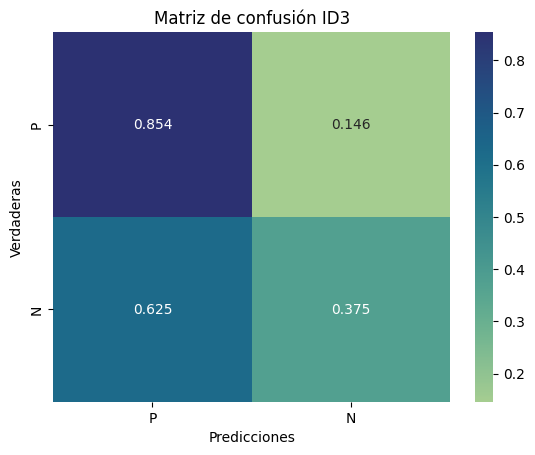

In [66]:
dict_test = datos_test.drop("Creditability", axis=1).to_dict("records") # Lista de diccionarios con los valores y atributos de test
credito_real = datos_test["Creditability"].values.tolist() # Lista con los valores reales de Creditability del conjunto de test
credito_pred = [] # Lista donde se guardarán las predicciones de Creditability de los datos de test

for registro in dict_test: # Para cada registro de prueba
  prediccion = calcularPrediccion(arbol, datos_train, registro, n_max = 3)
  credito_pred.append(prediccion)

calcularMatrizConfusion(credito_pred, credito_real, tipo = "ID3")

# Random Forest

## Calcular árboles


Para Random Forest se utiliza la función de calcularArbol para cada uno de los conjuntos de entrenamiento creados. Estos conjuntos tienen el mismo tamaño que el conjunto de entrenamiento original (800 registros) y se realizaron con reemplazo.

In [67]:
def calcularRandomForest(datos_train, n_arboles, atributos_Valores):
  arboles = []
  datos_train_rand = datos_train.sample(frac = 1, random_state=1, ignore_index=True)
  train_size = int(len(datos_train_rand)/n_arboles) 

  for i in range(n_arboles):
    conjunto = datos_train_rand[train_size*i:train_size*(i+1)] # Para que no se repitan entre conjuntos
    conjunto_ordenado = conjunto.sort_values("Creditability", ignore_index=True) # Ordenamos por Creditability de menor a mayor para asegurarnos de repetir principalmente los de clase No ya que hay pocos
    
    for j in range(len(conjunto_ordenado)): # Repetimos datos hasta llegar al tamaño deseado (800 registros)
      conjunto_ordenado = pd.concat([conjunto_ordenado, conjunto.iloc[j].to_frame().T], ignore_index=True)
      if len(conjunto_ordenado) >= len(datos_train_rand):
        break

    suma_si_total = len(conjunto_ordenado.loc[conjunto_ordenado["Creditability"].isin([1])])
    suma_no_total = len(conjunto_ordenado.loc[conjunto_ordenado["Creditability"].isin([0])])

    arbol = calcularArbol(conjunto_ordenado, suma_si_total, suma_no_total, atributos_Valores)
    arboles.append(arbol)

  return arboles

In [68]:
n_arboles = 3 # Número de árboles para el método de Random Forest
arboles_RF = calcularRandomForest(datos_train, n_arboles, atributos_Valores)

## Predicción

La predicción se realiza con la función del caso anterior que permite recorrer el árbol según los datos del registro de prueba que se tome.

In [69]:
def calcularPrediccionRF(arboles_RF, datos_train, dict_test, n_max):
  predicciones = []

  for arbol in arboles_RF: # Para cada árbol
    prediccion = calcularPrediccion(arbol, datos_train, dict_test, n_max)
    predicciones.append(prediccion)

  prediccion = st.mode(predicciones)
  return prediccion

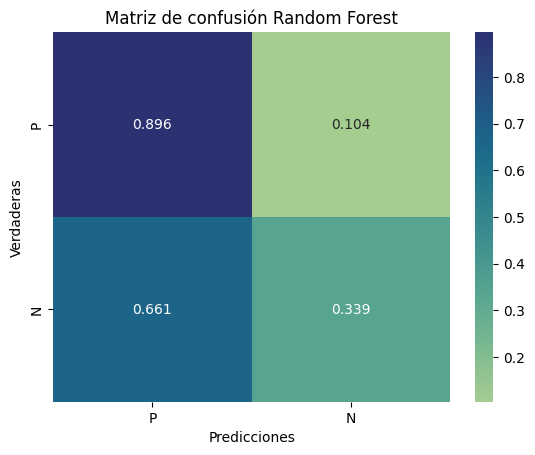

In [70]:
dict_test = datos_test.drop("Creditability", axis=1).to_dict("records") # Lista de diccionarios con los valores y atributos de test
credito_real = datos_test["Creditability"].values.tolist() # Lista con los valores reales de Creditability del conjunto de test
credito_pred = [] # Lista donde se guardarán las predicciones de Creditability de los datos de test

for registro in dict_test: # Para cada registro de prueba
  prediccion = calcularPrediccionRF(arboles_RF, datos_train, registro, n_max = 3)
  credito_pred.append(prediccion)

calcularMatrizConfusion(credito_pred, credito_real, tipo = "Random Forest")

# Gráfico de ajuste

Por útlimo, para obtener el gráfico de curvas de precisión de los modelos, primero se define la función que calcula la precisión dado una cantidad de nodos de profundidad. 

Se calcula la predicción de cada dato de prueba dado una cantidad de nodos y se verifica cuantas predicciones fueron correctas y cuantas incorrectas. Luego se calcula la precisión para una cierta cantidad de nodos como:

$s = \frac{correctos}{correctos+incorrectos}*100$ 

In [71]:
def calcularS(datos_train, dict_test, credito_real, cant_nodos, arbol, tipo):
  s = []

  for nodos in cant_nodos:
    correctos = 0
    incorrectos = 0
    for i in range(len(dict_test)):
      if tipo == "ID3":
        prediccion = calcularPrediccion(arbol, datos_train, dict_test[i], n_max = nodos)
      elif tipo == "RF":
        prediccion = calcularPrediccionRF(arboles_RF, datos_train, dict_test[i], n_max = nodos)

      if prediccion == 'Si' and credito_real[i] == 1:
        correctos += 1
      elif prediccion == 'No' and credito_real[i] == 0:
        correctos += 1
      else:
        incorrectos += 1
    
    s_nodos = 100 * correctos/(correctos + incorrectos)
    s.append(s_nodos)

  return s

La siguiente función realiza el gráfico de precisión vs cantidad de nodos.

In [75]:
def graficos(s_train, s_test, cant_nodos, tipo):
  plt.figure()
  plt.plot(cant_nodos, s_train, label = "Entrenamiento")
  plt.plot(cant_nodos, s_test, label = "Prueba")
  plt.xticks(range(1, len(cant_nodos)+1), [int(i) for i in cant_nodos])
  plt.xlabel("Número de nodos")
  plt.ylabel("Precisión")
  plt.title(f"Gráfico de ajuste {tipo}")
  plt.legend()
  plt.show()
  return

## ID3

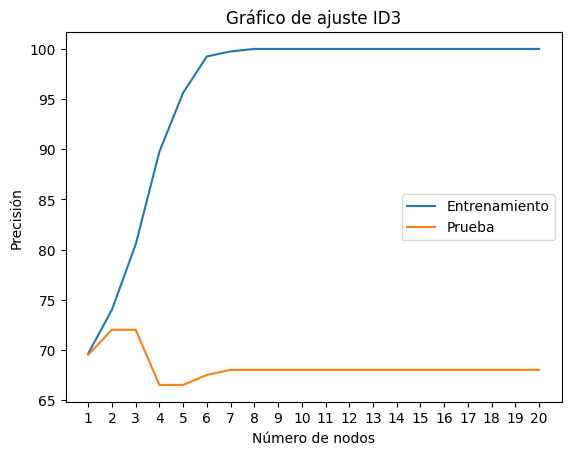

In [76]:
cant_nodos = np.arange(1, 21, dtype=int)

dict_test = datos_test.drop("Creditability", axis=1).to_dict("records")
dict_train = datos_train.drop("Creditability", axis=1).to_dict("records")
credito_real_test = datos_test["Creditability"].values.tolist()
credito_real_train = datos_train["Creditability"].values.tolist()

s_train = calcularS(datos_train, dict_train, credito_real_train, cant_nodos, arbol, tipo="ID3")
s_test = calcularS(datos_train, dict_test, credito_real_test, cant_nodos, arbol, tipo="ID3")

graficos(s_train, s_test, cant_nodos, tipo="ID3")

## Random Forest

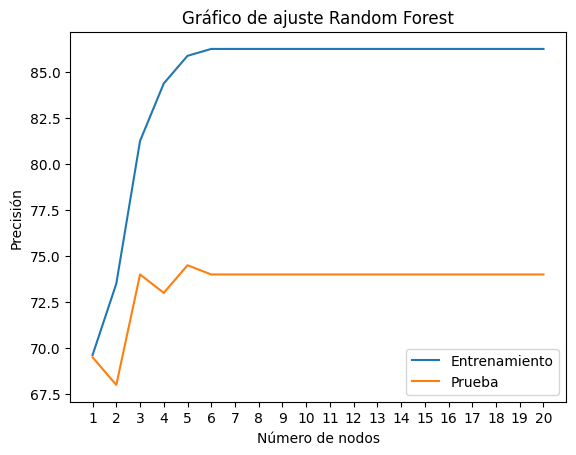

In [77]:
cant_nodos = np.arange(1, 21, dtype=int)

dict_test = datos_test.drop("Creditability", axis=1).to_dict("records")
dict_train = datos_train.drop("Creditability", axis=1).to_dict("records")
credito_real_test = datos_test["Creditability"].values.tolist()
credito_real_train = datos_train["Creditability"].values.tolist()

s_train = calcularS(datos_train, dict_train, credito_real_train, cant_nodos, arboles_RF, tipo = "RF")
s_test = calcularS(datos_train, dict_test, credito_real_test, cant_nodos, arboles_RF, tipo = "RF")

graficos(s_train, s_test, cant_nodos, tipo="Random Forest")